In [59]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, silhouette_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans, OPTICS, MeanShift, Birch, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.mixture import GaussianMixture
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import homogeneity_completeness_v_measure, accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score, completeness_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import time
import psutil
np.set_printoptions(precision=3, linewidth=100)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [60]:
from pathlib import Path
import pandas as pd
import os

# Specify the folder paths for the datasets you want to read
folder_paths = [
    "dataset/1",
    "dataset/2",
    "dataset/5",
    "dataset/7"
]

# Lists to store the DataFrames
train_dataframes = []
test_dataframes = []

# Iterate over the folder paths and files
for folder_path in folder_paths:
    files = os.listdir(folder_path)
    for file in files:
        if file.startswith("WELL-00002"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            test_dataframes.append(df)
#            test_datasets.append(file)  # Store the file name in test_datasets
        elif file.startswith("WELL-"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            train_dataframes.append(df)
#            train_datasets.append(file)  # Store the file name in train_datasets

# Print the lists
#print("Test Datasets:")
#for dataset, filename in zip(test_dataframes, test_datasets):
#    print("File:", filename)

#print("Train Datasets:")
#for dataset, filename in zip(train_dataframes, train_datasets):
#    print("File:", filename)

# Print the number of datasets in each set
print("Number of datasets for training:", len(train_dataframes))
print("Number of datasets for testing:", len(test_dataframes))


Number of datasets for training: 41
Number of datasets for testing: 2


In [61]:
#git.Repo.clone_from("https://github.com/petrobras/3W.git", "datasets")

In [62]:
# Combine all training datasets into one big training dataset
train_data = pd.concat(train_dataframes, ignore_index=True)

# Combine all testing datasets into one big testing dataset
test_data = pd.concat(test_dataframes, ignore_index=True)

# Print the shape of the combined training and testing datasets
print("Shape of the training dataset:", train_data.shape)
print("Shape of the testing dataset:", test_data.shape)

Shape of the training dataset: (1492098, 10)
Shape of the testing dataset: (33138, 10)


## Data preperation

### Clean Data: Remove Column with empty values

In [63]:
# Perform cleaning to remove columns with missing values

cleaned_training = train_data.dropna(axis='columns', how='all')  # Remove columns with missing values
cleaned_training = cleaned_training.dropna(axis=0)  # Remove rows with missing values
cleaned_training.isnull().sum()

timestamp     0
P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
QGL           0
class         0
dtype: int64

In [64]:
#cleaned_training.head()

In [65]:
cleaned_test = test_data.dropna(axis='columns', how='all')  # Remove columns with missing values
cleaned_test = cleaned_test.dropna(axis=0)  # Remove rows with missing values
cleaned_test.isnull().sum()

timestamp     0
P-PDG         0
P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
P-JUS-CKGL    0
QGL           0
class         0
dtype: int64

In [66]:
print("Shape of the training dataset:", cleaned_training.shape)
print("Shape of the testing dataset:", cleaned_test.shape)

Shape of the training dataset: (1222036, 9)
Shape of the testing dataset: (23316, 9)


In [67]:
cleaned_training['class'].value_counts()

0.0      480018
105.0    317565
107.0    282900
101.0     89088
7.0       25870
5.0       12069
1.0        7488
102.0      4211
2.0        2827
Name: class, dtype: int64

In [68]:
cleaned_test['class'].value_counts()

0.0      8511
101.0    6570
102.0    5096
1.0      2929
2.0       210
Name: class, dtype: int64

In [69]:
# Preprocess the data
# # Assuming the timestamp column is named 'timestamp'
# cleaned_training['timestamp'] = pd.to_datetime(cleaned_training['timestamp'])
# cleaned_training['year'] = cleaned_training['timestamp'].dt.year
# cleaned_training['month'] = cleaned_training['timestamp'].dt.month
# cleaned_training['day'] = cleaned_training['timestamp'].dt.day
# cleaned_training['hour'] = cleaned_training['timestamp'].dt.hour
# # Preprocess the data
# # Assuming the timestamp column is named 'timestamp'
# cleaned_test['timestamp'] = pd.to_datetime(cleaned_test['timestamp'])
# cleaned_test['year'] = cleaned_test['timestamp'].dt.year
# cleaned_test['month'] = cleaned_test['timestamp'].dt.month
# cleaned_test['day'] = cleaned_test['timestamp'].dt.day
# cleaned_test['hour'] = cleaned_test['timestamp'].dt.hour


## Split the data

In [70]:
X_train = cleaned_training.drop(['timestamp', 'class'], axis=1)
y_train = cleaned_training['class'].astype('int')

X_test = cleaned_test.drop(['timestamp', 'class'], axis=1)
y_test = cleaned_test['class'].astype('int')

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
from imblearn.under_sampling import RandomUnderSampler 

In [73]:
# over_sampling + grid search -> more time
# under_sampling + grid search -> less time

In [74]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train.ravel())

In [75]:
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [76]:
pd.Series(y_train_res).value_counts()

0      2827
1      2827
2      2827
5      2827
7      2827
101    2827
102    2827
105    2827
107    2827
dtype: int64

## Scaling each feature to a given range: using MinMaxScaler
## Feature selection

In [77]:
#minmax

from sklearn.preprocessing import MinMaxScaler

# Create the scaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
# columns = [col for col in X_train.columns if col not in ['timestamp', 'class']]
X_train_scaled = min_max_scaler.fit_transform(X_train_res)
X_train = pd.DataFrame(X_train_scaled,columns=list(X_train_res))

# Transform the test data using the trained scaler
X_test_scaled = min_max_scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns=list(X_train_res))

# Print the head of the scaled training and test data
print("Scaled Training Data:")
print(X_train.head())
print("\nScaled Test Data:")
print(X_test.head())


Scaled Training Data:
   P-PDG     P-TPT     T-TPT  P-MON-CKP  T-JUS-CKP  P-JUS-CKGL  QGL
0    1.0  0.000547  0.828649   0.129097   0.476079    0.009900  0.0
1    1.0  0.000638  0.820101   0.148118   0.443672    0.009902  0.0
2    1.0  0.000614  0.843333   0.164657   0.519052    0.009899  0.0
3    1.0  0.000616  0.843407   0.165557   0.538614    0.009899  0.0
4    1.0  0.004727  0.992228   0.146075   0.959757    0.000929  0.0

Scaled Test Data:
   P-PDG     P-TPT     T-TPT  P-MON-CKP  T-JUS-CKP  P-JUS-CKGL  QGL
0    1.0  0.004204  0.984258   0.604568   2.434609    0.002939  0.0
1    1.0  0.004204  0.984257   0.604530   2.434609    0.002939  0.0
2    1.0  0.004204  0.984256   0.604492   2.434609    0.002939  0.0
3    1.0  0.004204  0.984255   0.604454   2.434609    0.002939  0.0
4    1.0  0.004204  0.984255   0.604416   2.434609    0.002939  0.0


In [79]:
y_train = y_train_res

In [80]:
selector = SelectKBest(score_func=chi2, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X_train.columns[selected_feature_indices]

# Transform the scaled testing set using the selected features
X_test_selected = X_test.iloc[:, selected_feature_indices]

X_train = X_train[selected_feature_names]
X_test = X_test_selected

In [91]:
X_train.shape

(25443, 7)

# Supervised machine learning

In [84]:
# !pip install sktime

In [95]:
from sktime.classification.deep_learning import LSTMFCNClassifier

In [97]:
classifier = LSTMFCNClassifier()
classifier.fit(X_train.values, y_train)

KeyboardInterrupt: 

In [ ]:
pred_rfc = classifier.predict(X_test.values)

In [ ]:
print(classification_report(y_test, pred_rfc))

### Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(min_samples_leaf=500,n_jobs=-1)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [49]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8511
           1       0.00      0.00      0.00      2929
           2       0.00      0.00      0.00       210
         101       0.45      0.36      0.40      6570
         102       0.96      0.97      0.96      5096
         105       0.00      0.00      0.00         0

    accuracy                           0.31     23316
   macro avg       0.23      0.22      0.23     23316
weighted avg       0.34      0.31      0.32     23316



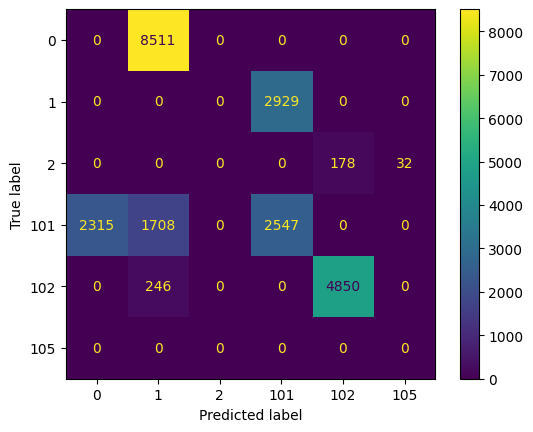

In [40]:
plot_confusion_matrix(rfc, X_test, y_test) 
plt.show()

In [41]:
pred_rfc_train = rfc.predict(X_train)

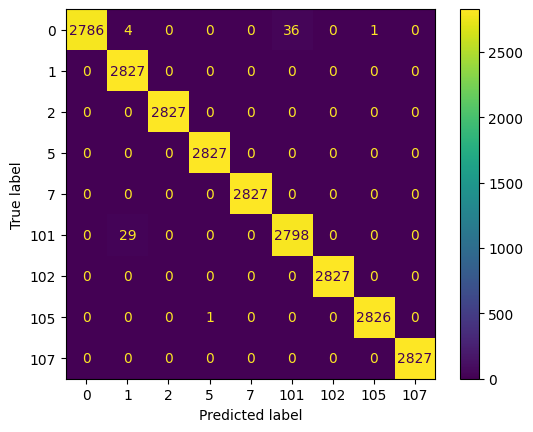

In [42]:
plot_confusion_matrix(rfc, X_train, y_train) 
plt.show()

In [24]:
print(classification_report(y_train, pred_rfc_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    480018
           1       0.99      1.00      0.99    480018
           2       1.00      1.00      1.00    480018
           5       1.00      1.00      1.00    480018
           7       1.00      1.00      1.00    480018
         101       0.97      0.99      0.98    480018
         102       1.00      1.00      1.00    480018
         105       0.97      0.99      0.98    480018
         107       1.00      1.00      1.00    480018

    accuracy                           0.99   4320162
   macro avg       0.99      0.99      0.99   4320162
weighted avg       0.99      0.99      0.99   4320162



In [55]:
param_grid = { 
    'n_estimators': [200, 500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf':[1,2,3]
}

In [ ]:
# https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn

In [58]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2,n_jobs=-1,verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


KeyboardInterrupt: 

In [ ]:
CV_rfc = best_estimator_

In [ ]:
CV_rfc.fit(X_train, y_train)

In [ ]:
# do the prediction

In [ ]:
# rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
print(accuracy_score(y_test, pred_rfc))

In [ ]:
rfc_scores = cross_val_score(rfc, X_train, y_train, cv=5,n_jobs=-1) #evaluation scores for each fold of the cross-validation process.
print(rfc_scores)
print("avrage =", np.mean(rfc_scores))

In [ ]:
#print("Random Forest Classifier Memory Consumption:", mem_usage_rfc)
#print("Random Forest Classifier Execution Time:", execution_time_rfc)

In [ ]:
print("No. of Classes in Test data:")
print(y_test.value_counts())
print("----------------------------")
print("No. of Classes in prediction:")
pd.crosstab(y_test, pred_rfc, margins=True)

In [ ]:
#rfc_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_rfc, labels=rfc.classes_), display_labels=rfc.classes_)
#rfc_disp.plot()
#plt.show()

### KNN :

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=-1)
classifier_knn.fit(X_train, y_train)
pred_knn = classifier_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_knn))

In [ ]:
print(accuracy_score(y_test, pred_knn))

In [ ]:
knn_scores = cross_val_score(classifier_knn, X_train, y_train, cv=5,n_jobs=-1)
print(knn_scores)
print("avrage =", np.mean(knn_scores))

In [ ]:
#print("KNN Memory Consumption:", mem_usage_knn)
#print("KNN Execution Time:", execution_time_knn)

In [ ]:
print("No. of Classes in Test data:")
print(y_test.value_counts())
print("----------------------------")
print("No. of Classes in prediction:")
pd.crosstab(y_test, pred_knn, margins=True)

In [ ]:
#knn_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_knn, labels=classifier_knn.classes_), display_labels=classifier_knn.classes_)
#knn_disp.plot()
#plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# param_grid = {'n_neighbors': [3, 4, 5, 6, 7]}

# Create the KNN classifier
classifier_knn = KNeighborsClassifier()

# Perform grid search to find the best value for n_neighbors
# grid_search = GridSearchCV(classifier_knn, param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)

# Retrieve the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Train the KNN classifier with the best value of n_neighbors
classifier_knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
classifier_knn_best.fit(X_train, y_train)

# Make predictions on the test set using the best classifier
pred_knn_best = classifier_knn_best.predict(X_test)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_knn_best))


### Decision Trees

In [44]:
dt = DecisionTreeClassifier()

#mem_usage_before_dt = get_memory_usage()

# Measure time taken
#start_time = time.time()
dt.fit(X_train, y_train)
#end_time = time.time()
#execution_time_dt = end_time - start_time

# Measure memory consumption after fitting
#mem_usage_after_dt = get_memory_usage()
#mem_usage_dt = mem_usage_after_dt - mem_usage_before_dt

pred_dt = dt.predict(X_test)

In [45]:
print(classification_report(y_test, pred_dt, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8511
           1       0.00      0.00      0.00      2929
           2       0.00      0.00      0.00       210
         101       0.57      0.59      0.58      6570
         102       0.96      0.97      0.96      5096
         105       0.00      0.00      0.00         0

    accuracy                           0.38     23316
   macro avg       0.26      0.26      0.26     23316
weighted avg       0.37      0.38      0.38     23316



In [ ]:
print(accuracy_score(y_test, pred_dt))

In [ ]:
dt_scores = cross_val_score(dt, X_train, y_train, cv=5)
print(dt_scores)
print("avrage =", np.mean(dt_scores))

In [ ]:
#print("Decision Trees Memory Consumption:", mem_usage_dt)
#print("Decision Trees Execution Time:", execution_time_dt)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

#mem_usage_before_nb = get_memory_usage()

# Measure time taken
#start_time = time.time()
nb.fit(X_train, y_train)
#end_time = time.time()
#execution_time_nb = end_time - start_time

# Measure memory consumption after fitting
#mem_usage_after_nb = get_memory_usage()
#mem_usage_nb = mem_usage_after_nb - mem_usage_before_nb


pred_nb = nb.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_nb, zero_division=0))

In [ ]:
print(accuracy_score(y_test, pred_nb))

In [ ]:
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)
print(nb_scores)
print("avrage =", np.mean(nb_scores))

In [ ]:
#print("Naive Bayes Memory Consumption:", mem_usage_nb)
#print("Naive Bayes Execution Time:", execution_time_nb)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logreg = LogisticRegression(multi_class='auto')

#mem_usage_before_logreg = get_memory_usage()

# Measure time taken
#start_time = time.time()
logreg.fit(X_train, y_train)
#end_time = time.time()
#execution_time_logreg = end_time - start_time

# Measure memory consumption after fitting
#mem_usage_after_logreg = get_memory_usage()
#mem_usage_logreg = mem_usage_after_logreg - mem_usage_before_logreg

pred_logreg = logreg.predict(X_test)

In [47]:
print(classification_report(y_test, pred_logreg, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8511
           1       0.13      1.00      0.22      2929
           2       0.00      0.00      0.00       210
         101       0.00      0.00      0.00      6570
         102       0.00      0.00      0.00      5096

    accuracy                           0.13     23316
   macro avg       0.03      0.20      0.04     23316
weighted avg       0.02      0.13      0.03     23316



In [ ]:
print(accuracy_score(y_test, pred_logreg))

In [ ]:
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(logreg_scores)
print("avrage =", np.mean(logreg_scores))

In [ ]:
#print("Logistic Regression  Memory Consumption:", mem_usage_logreg)
#print("Logistic Regression  Execution Time:", execution_time_logreg)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplots with 1 row and 5 columns
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot for rf_predictions
sns.distplot((y_test - pred_rfc), ax=axs[0])
axs[0].set_title('RF Residuals')

# Plot for knn_predictions
sns.distplot((y_test - pred_knn), ax=axs[1])
axs[1].set_title('KNN Residuals')

# Plot for dt_predictions
sns.distplot((y_test - pred_dt), ax=axs[2])
axs[2].set_title('DT Residuals')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
# Plot for nb_predictions
sns.distplot((y_test - pred_nb), ax=axs[0])
axs[0].set_title('NB Residuals')

# Plot for logreg_predictions
sns.distplot((y_test - pred_logreg), ax=axs[1])
axs[1].set_title('Logistic Regression Residuals')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### MLP (Multi-layer Perceptron - Neural network):

In [ ]:
mlpc = MLPClassifier()

mem_usage_before_mlpc = get_memory_usage()

# Measure time taken
start_time = time.time()
mlpc.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_mlpc = end_time - start_time

# Measure memory consumption after fitting
mem_usage_after_mlpc = get_memory_usage()
mem_usage_mlpc = mem_usage_after_mlpc - mem_usage_before_mlpc

pred_mlpc = mlpc.predict(X_test_selected)

In [ ]:
print(classification_report(y_test, pred_mlpc, zero_division=0))

In [ ]:
print(accuracy_score(y_test, pred_mlpc))

In [ ]:
print("MLPC Memory Consumption:", mem_usage_mlpc)
print("MLPC Execution Time:", execution_time_mlpc)

## parameter grid

### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for RandomForestClassifier
rfc_param_grid = {
    'n_estimators': [100, 25, 50, 250],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search for RandomForestClassifier
grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid=rfc_param_grid, scoring='accuracy', cv=5)
grid_search_rfc.fit(X_train_selected, y_train)

# Access the best parameters and results
best_params_rfc = grid_search_rfc.best_params_
best_score_rfc = grid_search_rfc.best_score_

# Fit the best model on the training data
best_rfc = grid_search_rfc.best_estimator_
best_rfc.fit(X_train_selected, y_train)

# Make predictions on the test data
pred_best_rfc = best_rfc.predict(X_test_selected)

# Print classification report and accuracy score for RandomForestClassifier
print("RandomForestClassifier:")
print(classification_report(y_test, pred_best_rfc, zero_division=0))
print("Accuracy:", accuracy_score(y_test, pred_best_rfc))
print("Best parameters:")
print(best_params_rfc)


### KNN

In [ ]:
# Initializing a grid with possible number of neighbors from 1 to 10
grid = {'n_neighbors': np.arange(1, 10)}

# Initializing a k-NN classifier
knn_classifier = KNeighborsClassifier()

# Using cross validation to find the optimal number of neighbors
knn = GridSearchCV(knn_classifier, grid, cv=5)
knn.fit(X_train, y_train)

# Getting the best number of neighbors from GridSearchCV
best_k = knn.best_params_['n_neighbors']

# Initializing the k-NN classifier with the best number of neighbors
classifier_knn = KNeighborsClassifier(n_neighbors=best_k)

mem_usage_before_knn = get_memory_usage()

# Measure time taken
start_time = time.time()
classifier_knn.fit(X_train_selected, y_train)
end_time = time.time()
execution_time_knn = end_time - start_time

# Measure memory consumption after fitting
mem_usage_after_knn = get_memory_usage()
mem_usage_knn = mem_usage_after_knn - mem_usage_before_knn

pred_knn = classifier_knn.predict(X_test_selected)


In [ ]:
#Extracting the optimal number of neighbors 

knn.best_params_

In [ ]:
#Extracting the accuracy score for optimal number of neighbors

knn.best_score_

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform Grid Search for KNeighborsClassifier
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_param_grid, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train_selected, y_train)

# Access the best parameters and results
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Fit the best KNeighborsClassifier model on the training data
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train_selected, y_train)

# Make predictions on the test data
pred_best_knn = best_knn.predict(X_test_selected)

# Print classification report and accuracy score for KNeighborsClassifier
print("KNeighborsClassifier:")
print(classification_report(y_test, pred_best_knn, zero_division=0))
print("Accuracy:", accuracy_score(y_test, pred_best_knn))
print("Best parameter:")
print(best_params_knn)


### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for DecisionTreeClassifier
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param_grid, scoring='accuracy', cv=5)
grid_search_dt.fit(X_train_selected, y_train)

# Access the best parameters and results
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Create and fit the best DecisionTreeClassifier model
best_dt = DecisionTreeClassifier(**best_params_dt)
best_dt.fit(X_train_selected, y_train)

# Make predictions on the test data
pred_best_dt = best_dt.predict(X_test_selected)

# Print classification report and accuracy score for DecisionTreeClassifier
print("DecisionTreeClassifier:")
print(classification_report(y_test, pred_best_dt, zero_division=0))
print("Accuracy:", accuracy_score(y_test, pred_best_dt))
print("Best parameter:")
print(best_params_dt)


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LogisticRegression
logreg_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform Grid Search for LogisticRegression
grid_search_logreg = GridSearchCV(estimator=LogisticRegression(), param_grid=logreg_param_grid, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_selected, y_train)

# Access the best parameters and results
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

# Create and fit the best LogisticRegression model
best_logreg = LogisticRegression(**best_params_logreg)
best_logreg.fit(X_train_selected, y_train)

# Make predictions on the test data
pred_best_logreg = best_logreg.predict(X_test_selected)

# Print classification report and accuracy score for LogisticRegression
print("LogisticRegression:")
print(classification_report(y_test, pred_best_logreg, zero_division=0))
print("Accuracy:", accuracy_score(y_test, pred_best_logreg))
print("Best parameter:")
print(best_params_logreg)
